# Load data and keep 2019 timepoint

In [1]:
import pandas as pd

df_covid_AP = pd.read_csv('../lung_pollution/data/covid_pollution_clean.csv')

df_covid_AP.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace = True)
df_covid_AP = df_covid_AP.rename(columns={"PM2.5_annualMean": "PM2_5_annualMean", "Fully vaccinated": "Fully_vaccinated", "Population density": "Population_density"})

In [2]:
df_covid_AP.shape

(4000, 23)

In [3]:
df_covid_AP.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k',
       'Fully_vaccinated', 'Population_density'],
      dtype='object')

In [4]:
df_covid_AP.sort_values(['year'], axis=0, ascending=False,inplace=True,ignore_index=True)
df_covid_AP_2019 = df_covid_AP[0:400]

# RobustScale features

In [5]:
df_num = df_covid_AP_2019[['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]

In [6]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()  # Instanciate Robust Scaler

r_scaler.fit(df_num)  # Fit scaler to feature
scaled_num = r_scaler.transform(df_num)  #Scale

df_num = pd.DataFrame(scaled_num, columns = df_num.columns)

df_covid_AP_2019[['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]] = df_num[['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]

/home/curi/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [7]:
df_covid_AP_2019

,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,O3_dailyHourlyMax,O3_daily8HrMax,...,BL,EWZ,Shape__Area,death_rate,cases,deaths,cases_per_100k,deaths_per_100k,Fully_vaccinated,Population_density
0,StädteRegion Aachen,2019,-2.203068,-0.763575,-2.300578,2.120480,3.007296,1.298675,8.818734,2.813240,...,Nordrhein-Westfalen,556631,7.046180e+08,1.834700,33902,622,0.094656,0.033919,1.405405,1.088239
1,LK Diepholz,2019,-0.052210,0.194800,-0.089904,0.047668,0.154966,-0.095789,0.003952,0.001518,...,Niedersachsen,218072,1.989167e+09,1.279707,8752,112,-0.806295,-0.860765,0.972973,-0.169324
2,LK Coesfeld,2019,0.349943,0.319211,0.290399,-0.159157,0.019424,-0.248210,-0.033597,-0.082804,...,Nordrhein-Westfalen,220712,1.111795e+09,1.450909,7099,103,-1.151954,-0.930285,1.405405,-0.005020
3,LK Passau,2019,0.028195,0.219674,-0.040813,-0.202963,-0.009285,-0.280493,-0.041550,-0.100664,...,Bayern,193454,1.532712e+09,2.123258,18368,390,1.571156,1.365247,0.000000,-0.138664
4,LK Peine,2019,0.026144,0.219040,-0.053546,0.233382,0.276674,0.041074,0.037669,0.077233,...,Niedersachsen,135844,5.360006e+08,1.523207,6959,106,-0.325100,-0.465588,0.972973,0.096497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,SK Ludwigshafen,2019,1.383743,-0.763575,0.162964,-1.179986,-0.841235,-0.196633,6.534858,9.251140,...,Rheinland-Pfalz,172557,7.781020e+07,2.465243,13954,344,0.960395,1.332000,0.405405,3.727207
396,LK Vorpommern-Greifswald,2019,-3.090594,-0.763575,-2.246812,0.586518,-0.841235,-0.569132,-2.884293,-2.364550,...,Mecklenburg-Vorpommern,235773,3.800116e+09,2.437623,12184,297,-0.305628,0.244682,0.054054,-0.257283
397,SK Neumünster,2019,-0.184678,0.153820,-0.127614,0.052874,0.158378,-0.091953,0.004897,0.003640,...,Schleswig-Holstein,79905,7.140224e+07,0.889996,2809,25,-1.022262,-1.158162,1.675676,1.696567
398,LK Uckermark,2019,-0.227153,0.140679,-0.265927,0.252246,0.289036,0.054976,0.041093,0.084924,...,Brandenburg,118250,3.081478e+09,3.458038,4945,171,-0.733227,0.520865,-1.243243,-0.301034


# Analyze distribution of features and targets

In [8]:
# keep useful features only
df_covid_AP_2019 = df_covid_AP_2019[['county', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density', 'cases_per_100k', 'deaths_per_100k'
       ]]

In [9]:
#numerical features
feature_list = ['NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density']

In [10]:
target_list = ['cases_per_100k', 'deaths_per_100k']

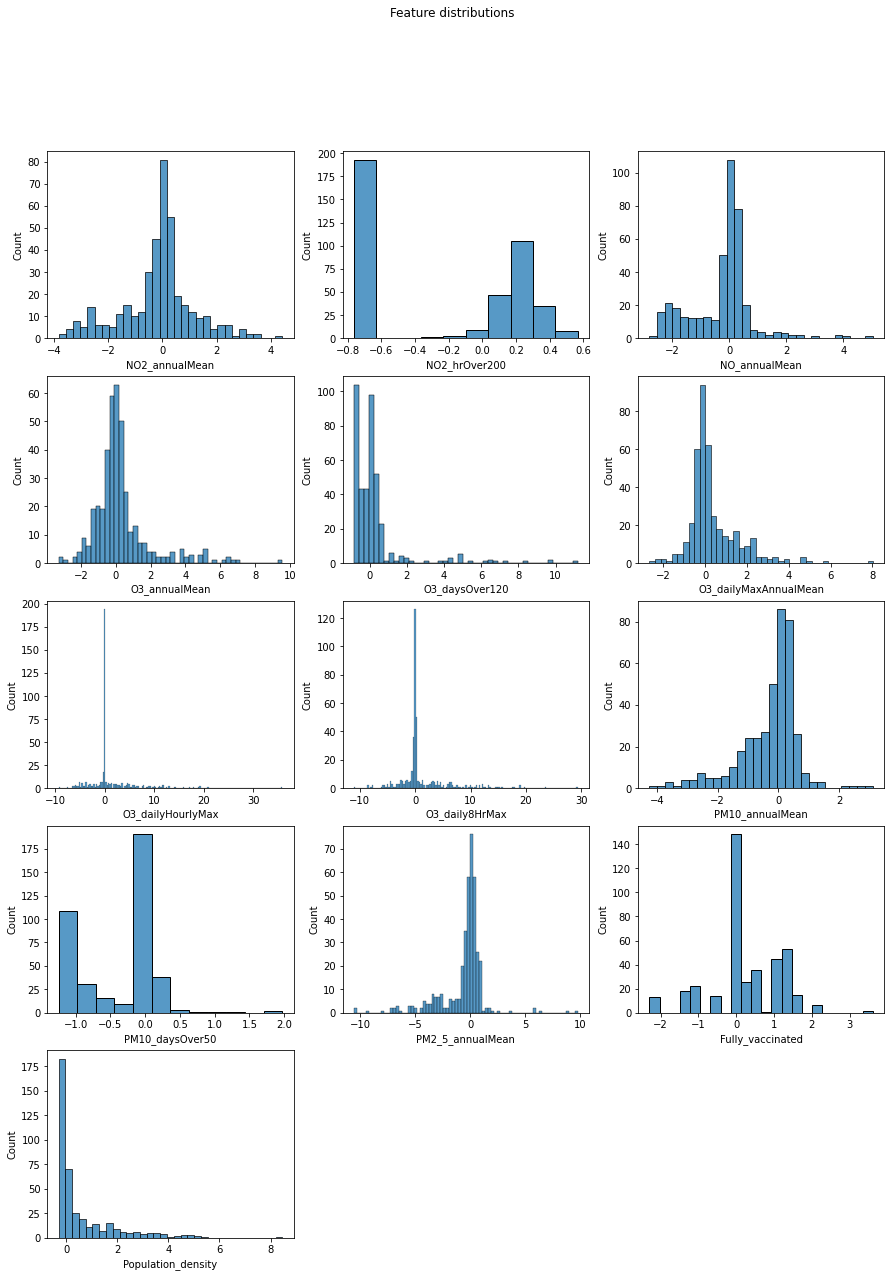

In [11]:
#check distribution of numerical features 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    sns.histplot(df_covid_AP_2019[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

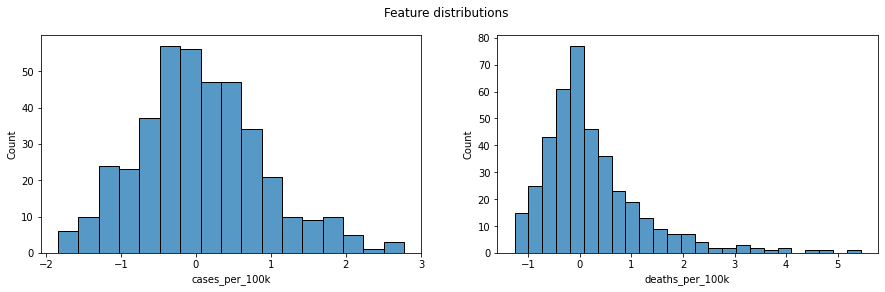

In [12]:
#check distribution of targets

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

for i, feature in enumerate(target_list):
    # First subplot
    plt.subplot(1,2,i+1)
    sns.histplot(df_covid_AP_2019[feature])
    # Global figure methods
plt.suptitle('Feature distributions')
plt.show()

# Visual analysis of feature-target correlation

## Target: deaths per 100k

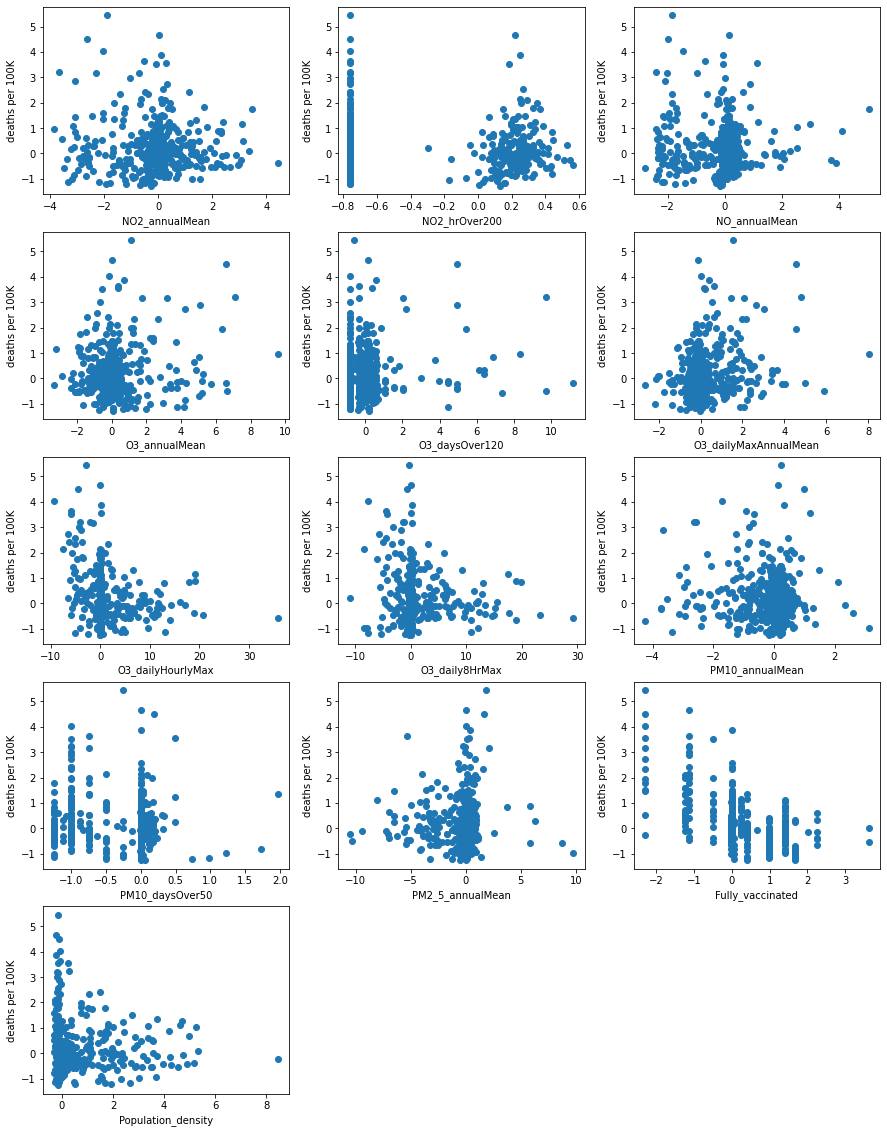

In [13]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    plt.scatter(df_covid_AP_2019[feature], df_covid_AP_2019['deaths_per_100k'])
    plt.xlabel(feature)
    plt.ylabel("deaths per 100K")
    # Global figure methods
plt.show()

## Target: cases per 100k

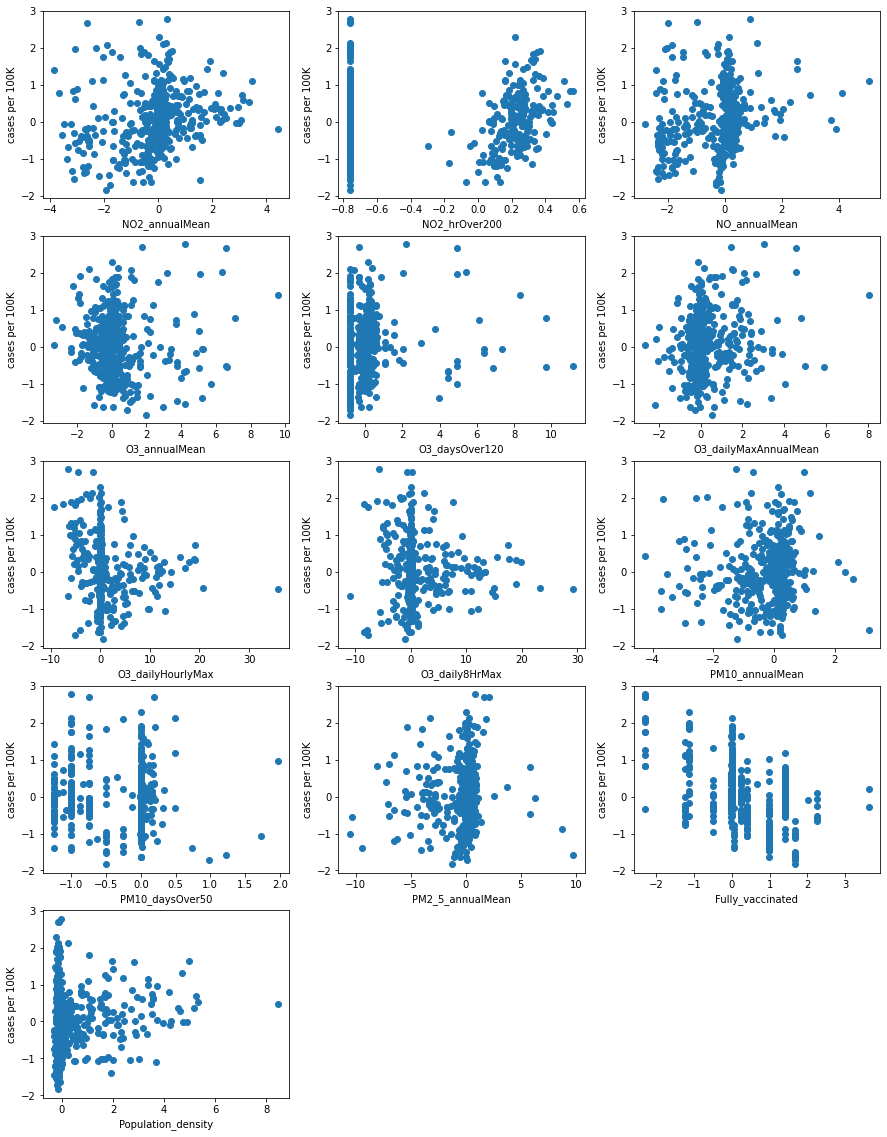

In [14]:
# First subplot
plt.figure(figsize=(15,20))

for i, feature in enumerate(feature_list):
    # First subplot
    plt.subplot(5,3,i+1)
    plt.scatter(df_covid_AP_2019[feature], df_covid_AP_2019['cases_per_100k'])
    plt.xlabel(feature)
    plt.ylabel("cases per 100K")
    # Global figure methods
plt.show()

## Correlation plot

<AxesSubplot:>

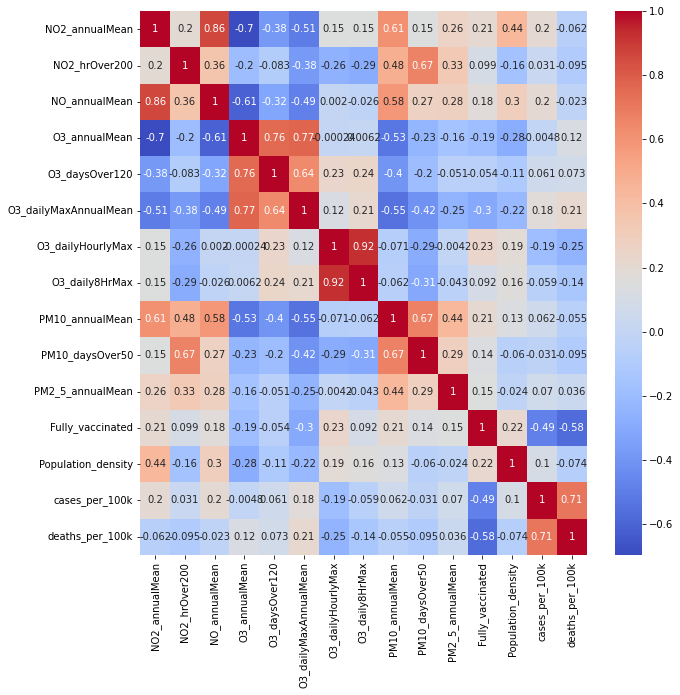

In [15]:
import seaborn as sns
plt.figure(figsize = (10,10))

sns.heatmap(df_covid_AP_2019.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10})

# OLS: deaths per 100k

## Univariate linear regression

In [16]:
import statsmodels.formula.api as smf

### Vaccination status

In [17]:
model = smf.ols(formula = 'deaths_per_100k ~ Fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     198.8
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           6.67e-37
Time:                        11:12:29   Log-Likelihood:                -487.24
No. Observations:                 400   AIC:                             978.5
Df Residuals:                     398   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3971      0.042      9.345      0.000       0.314       0.481
Fully_vaccinated    -0.6099      0.043    -14.100      0.000      -0.695      -0.525
==============================================================================
Omnibus:                       93.260   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.962
Skew:                           1.190   Prob(JB):                     6.94e-46
Kurtosis:                       5.611   Cond. No.                         1.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
import numpy as np
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8180470229308339

### Population density

In [19]:
model = smf.ols(formula = 'deaths_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.166
Date:                Fri, 26 Nov 2021   Prob (F-statistic):              0.142
Time:                        11:12:29   Log-Likelihood:                -567.18
No. Observations:                 400   AIC:                             1138.
Df Residuals:                     398   BIC:                             1146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.2752      0.055      4.961      0.000       0.166       0.384
Population_density    -0.0580      0.039     -1.472      0.142      -0.135       0.019
==============================================================================
Omnibus:                      147.676   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.709
Skew:                           1.697   Prob(JB):                    9.20e-106
Kurtosis:                       7.183   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.9990231363697876

### NO2

In [21]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.513
Date:                Fri, 26 Nov 2021   Prob (F-statistic):              0.219
Time:                        11:12:29   Log-Likelihood:                -567.51
No. Observations:                 400   AIC:                             1139.
Df Residuals:                     398   BIC:                             1147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2323      0.051      4.600      0.000       0.133       0.332
NO2_annualMean    -0.0467      0.038     -1.230      0.219      -0.121       0.028
==============================================================================
Omnibus:                      146.022   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.285
Skew:                           1.680   Prob(JB):                    1.02e-103
Kurtosis:                       7.143   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.9998399120304602

### NO 

In [23]:
model = smf.ols(formula = 'deaths_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2121
Date:                Fri, 26 Nov 2021   Prob (F-statistic):              0.645
Time:                        11:12:29   Log-Likelihood:                -568.16
No. Observations:                 400   AIC:                             1140.
Df Residuals:                     398   BIC:                             1148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2348      0.051      4.560      0.000       0.134       0.336
NO_annualMean    -0.0214      0.046     -0.461      0.645      -0.113       0.070
==============================================================================
Omnibus:                      150.597   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.003
Skew:                           1.724   Prob(JB):                    2.19e-110
Kurtosis:                       7.291   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1.0014711804123115

### Ozon

In [25]:
model = smf.ols(formula = 'deaths_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.893
Date:                Fri, 26 Nov 2021   Prob (F-statistic):             0.0156
Time:                        11:12:29   Log-Likelihood:                -565.33
No. Observations:                 400   AIC:                             1135.
Df Residuals:                     398   BIC:                             1143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2188      0.051      4.322      0.000       0.119       0.318
O3_annualMean     0.0747      0.031      2.427      0.016       0.014       0.135
==============================================================================
Omnibus:                      141.073   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              447.758
Skew:                           1.627   Prob(JB):                     5.90e-98
Kurtosis:                       7.034   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.9944036748745454

### PM2.5

In [27]:
model = smf.ols(formula = 'deaths_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5195
Date:                Fri, 26 Nov 2021   Prob (F-statistic):              0.471
Time:                        11:12:29   Log-Likelihood:                -568.01
No. Observations:                 400   AIC:                             1140.
Df Residuals:                     398   BIC:                             1148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2499      0.052      4.806      0.000       0.148       0.352
PM2_5_annualMean     0.0171      0.024      0.721      0.471      -0.030       0.064
==============================================================================
Omnibus:                      150.330   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.425
Skew:                           1.721   Prob(JB):                    4.81e-110
Kurtosis:                       7.285   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1.0010848709133817

### PM10

In [29]:
model = smf.ols(formula = 'deaths_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.210
Date:                Fri, 26 Nov 2021   Prob (F-statistic):              0.272
Time:                        11:12:29   Log-Likelihood:                -567.66
No. Observations:                 400   AIC:                             1139.
Df Residuals:                     398   BIC:                             1147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2240      0.052      4.287      0.000       0.121       0.327
PM10_annualMean    -0.0564      0.051     -1.100      0.272      -0.157       0.044
==============================================================================
Omnibus:                      152.501   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.876
Skew:                           1.734   Prob(JB):                    6.42e-115
Kurtosis:                       7.418   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

1.000219336166327

## Multivariate linear regression

In [31]:
model = smf.ols(formula = 'deaths_per_100k ~ NO2_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deaths_per_100k   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     36.42
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.73e-35
Time:                        11:12:29   Log-Likelihood:                -479.84
No. Observations:                 400   AIC:                             973.7
Df Residuals:                     393   BIC:                             1002.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4059      0.049      8.240      0.000       0.309       0.503
NO2_annualMean         0.0457      0.051      0.899      0.369      -0.054       0.146
O3_annualMean          0.0620      0.036      1.735      0.084      -0.008       0.132
PM10_annualMean        0.0322      0.058      0.553      0.580      -0.082       0.147
PM2_5_annualMean       0.0542      0.022      2.502      0.013       0.012       0.097
Fully_vaccinated      -0.6429      0.045    -14.335      0.000      -0.731      -0.555
Population_density     0.0493      0.037      1.339      0.181      -0.023       0.122
==============================================================================
Omnibus:                       89.348   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.400
Skew:                           1.129   Prob(JB):                     4.12e-45
Kurtosis:                       5.676   Cond. No.                         4.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8030557330039754

# OLS: cases per 100k

## Univariate linear regression

### Vaccination status

In [33]:
model = smf.ols(formula = 'cases_per_100k ~ Fully_vaccinated', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     126.5
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.15e-25
Time:                        11:12:29   Log-Likelihood:                -441.09
No. Observations:                 400   AIC:                             886.2
Df Residuals:                     398   BIC:                             894.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1749      0.038      4.619      0.000       0.100       0.249
Fully_vaccinated    -0.4334      0.039    -11.246      0.000      -0.509      -0.358
==============================================================================
Omnibus:                        9.286   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.798
Skew:                           0.203   Prob(JB):                       0.0334
Kurtosis:                       2.507   Cond. No.                         1.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.7289095065444727

### Population density

In [35]:
model = smf.ols(formula = 'cases_per_100k ~ Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.040
Date:                Fri, 26 Nov 2021   Prob (F-statistic):             0.0451
Time:                        11:12:29   Log-Likelihood:                -494.26
No. Observations:                 400   AIC:                             992.5
Df Residuals:                     398   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0233      0.046      0.505      0.614      -0.068       0.114
Population_density     0.0660      0.033      2.010      0.045       0.001       0.131
==============================================================================
Omnibus:                       19.867   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.482
Skew:                           0.532   Prob(JB):                     2.16e-05
Kurtosis:                       3.397   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8325225709089548

### NO2

In [37]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.55
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.71e-05
Time:                        11:12:29   Log-Likelihood:                -488.13
No. Observations:                 400   AIC:                             980.3
Df Residuals:                     398   BIC:                             988.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0844      0.041      2.037      0.042       0.003       0.166
NO2_annualMean     0.1267      0.031      4.069      0.000       0.065       0.188
==============================================================================
Omnibus:                       32.343   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.625
Skew:                           0.684   Prob(JB):                     4.10e-09
Kurtosis:                       3.669   Cond. No.                         1.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.819861836471156

### NO 

In [39]:
model = smf.ols(formula = 'cases_per_100k ~ NO_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     16.74
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           5.18e-05
Time:                        11:12:29   Log-Likelihood:                -488.04
No. Observations:                 400   AIC:                             980.1
Df Residuals:                     398   BIC:                             988.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1017      0.042      2.414      0.016       0.019       0.185
NO_annualMean     0.1556      0.038      4.092      0.000       0.081       0.230
==============================================================================
Omnibus:                       28.026   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.628
Skew:                           0.625   Prob(JB):                     8.22e-08
Kurtosis:                       3.630   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8196723460155986

### Ozon

In [41]:
model = smf.ols(formula = 'cases_per_100k ~ O3_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.009209
Date:                Fri, 26 Nov 2021   Prob (F-statistic):              0.924
Time:                        11:12:29   Log-Likelihood:                -496.27
No. Observations:                 400   AIC:                             996.5
Df Residuals:                     398   BIC:                             1005.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0640      0.043      1.503      0.134      -0.020       0.148
O3_annualMean    -0.0025      0.026     -0.096      0.924      -0.053       0.048
==============================================================================
Omnibus:                       14.642   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.206
Skew:                           0.458   Prob(JB):                     0.000499
Kurtosis:                       3.268   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.836727980915822

### PM2.5

In [43]:
model = smf.ols(formula = 'cases_per_100k ~ PM2_5_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.947
Date:                Fri, 26 Nov 2021   Prob (F-statistic):              0.164
Time:                        11:12:29   Log-Likelihood:                -495.30
No. Observations:                 400   AIC:                             994.6
Df Residuals:                     398   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0792      0.043      1.826      0.069      -0.006       0.164
PM2_5_annualMean     0.0277      0.020      1.395      0.164      -0.011       0.067
==============================================================================
Omnibus:                       13.223   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.595
Skew:                           0.437   Prob(JB):                      0.00112
Kurtosis:                       3.230   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8346986783678119

### PM10

In [45]:
model = smf.ols(formula = 'cases_per_100k ~ PM10_annualMean', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.540
Date:                Fri, 26 Nov 2021   Prob (F-statistic):              0.215
Time:                        11:12:29   Log-Likelihood:                -495.50
No. Observations:                 400   AIC:                             995.0
Df Residuals:                     398   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0785      0.044      1.800      0.073      -0.007       0.164
PM10_annualMean     0.0532      0.043      1.241      0.215      -0.031       0.137
==============================================================================
Omnibus:                       15.420   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.121
Skew:                           0.465   Prob(JB):                     0.000316
Kurtosis:                       3.317   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.8351230200768954

## Multivariate linear regression

In [47]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean + O3_annualMean + PM10_annualMean + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     39.56
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.34e-37
Time:                        11:12:29   Log-Likelihood:                -401.77
No. Observations:                 400   AIC:                             817.5
Df Residuals:                     393   BIC:                             845.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1770      0.041      4.369      0.000       0.097       0.257
NO2_annualMean         0.2468      0.042      5.903      0.000       0.165       0.329
O3_annualMean          0.1062      0.029      3.613      0.000       0.048       0.164
PM10_annualMean       -0.0008      0.048     -0.016      0.987      -0.095       0.093
PM2_5_annualMean       0.0353      0.018      1.984      0.048       0.000       0.070
Fully_vaccinated      -0.5063      0.037    -13.723      0.000      -0.579      -0.434
Population_density     0.0781      0.030      2.577      0.010       0.019       0.138
==============================================================================
Omnibus:                        8.669   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.625
Skew:                           0.352   Prob(JB):                       0.0134
Kurtosis:                       3.147   Cond. No.                         4.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model = smf.ols(formula = 'cases_per_100k ~ NO2_annualMean + NO2_hrOver200 + NO_annualMean + O3_annualMean + O3_daysOver120 + O3_dailyMaxAnnualMean + O3_dailyHourlyMax + O3_daily8HrMax + PM10_annualMean + PM10_daysOver50 + PM2_5_annualMean + Fully_vaccinated + Population_density', data = df_covid_AP_2019).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_100k   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     24.33
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.25e-42
Time:                        11:12:30   Log-Likelihood:                -376.58
No. Observations:                 400   AIC:                             781.2
Df Residuals:                     386   BIC:                             837.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1542      0.044      3.532      0.000       0.068       0.240
NO2_annualMean            0.1644      0.066      2.473      0.014       0.034       0.295
NO2_hrOver200             0.0819      0.096      0.856      0.392      -0.106       0.270
NO_annualMean             0.0659      0.065      1.008      0.314      -0.063       0.194
O3_annualMean            -0.0651      0.049     -1.317      0.188      -0.162       0.032
O3_daysOver120            0.0700      0.037      1.886      0.060      -0.003       0.143
O3_dailyMaxAnnualMean     0.2177      0.051      4.239      0.000       0.117       0.319
O3_dailyHourlyMax        -0.0698      0.020     -3.517      0.000      -0.109      -0.031
O3_daily8HrMax            0.0361      0.021      1.750      0.081      -0.004       0.077
PM10_annualMean           0.0102      0.068      0.151      0.880      -0.123       0.143
PM10_daysOver50          -0.0220      0.108     -0.203      0.839      -0.235       0.191
PM2_5_annualMean          0.0422      0.017      2.430      0.016       0.008       0.076
Fully_vaccinated         -0.4145      0.039    -10.733      0.000      -0.490      -0.339
Population_density        0.1063      0.030      3.534      0.000       0.047       0.165
==============================================================================
Omnibus:                        7.006   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.889
Skew:                           0.316   Prob(JB):                       0.0319
Kurtosis:                       3.116   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
RMSE = np.sqrt((model.resid**2).mean())
RMSE

0.620346365222002

# Feature and target definition

In [50]:
X = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_annualMean', 'PM10_annualMean','PM2_5_annualMean', 'Fully_vaccinated', 'Population_density']]
y_mort = df_covid_AP_2019[['deaths_per_100k']]
y_cases = df_covid_AP_2019[['cases_per_100k']]

# Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

## Deaths per 100k

In [74]:
linreg = LinearRegression()
cv_results_death = cross_validate(linreg, X, y_mort, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error'])

pd.DataFrame(cv_results_death)

,fit_time,score_time,test_max_error,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.005504,0.011871,-2.016108,0.193436,-0.615593,-0.582070
1,0.007264,0.010662,-3.683081,0.347386,-0.630179,-0.940507
2,0.003639,0.008018,-3.570054,0.428807,-0.542697,-0.544238
3,0.003944,0.006890,-2.812669,0.198450,-0.621295,-0.632235
4,0.003939,0.007617,-2.583551,0.313479,-0.663370,-0.708411


In [72]:
cv_results_death['test_r2'].mean()

0.2963115501916264

## Cases per 100k

In [73]:
linreg = LinearRegression()
cv_results_cases = cross_validate(linreg, X, y_cases, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error'])

cv_results_cases['test_r2'].mean()

0.31753722560808173

# KNN

## Cases per 100k

In [54]:
from sklearn.neighbors import KNeighborsRegressor

# Instanciate model
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y_cases)
neigh.score(X, y_cases)

0.7892056006784937

## Deaths per 100k

In [55]:
# Instanciate model
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, y_mort)
neigh.score(X, y_mort)

0.7309186858567673

# Radius Neighbors Regressor

In [56]:
from sklearn.neighbors import RadiusNeighborsRegressor

## Deaths per 100k

In [57]:
RadNeigh = RadiusNeighborsRegressor(radius=1.0).fit(X,y_mort)
RadNeigh.score(X,y_mort)

0.7628928774847563

## Cases per 100k

In [58]:
RadNeigh = RadiusNeighborsRegressor(radius=1.0).fit(X,y_cases)
RadNeigh.score(X,y_cases)

0.755605009604216

# Support Vector Regression

## deaths per 100k

In [59]:
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(X,y_mort)
SVR.score(X,y_mort)


/home/curi/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4897788825186674

## cases per 100k

In [60]:
from sklearn.svm import SVR

# Instanciate model
SVR = SVR()
SVR.fit(X,y_cases)
SVR.score(X,y_cases)

/home/curi/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5402629328825226